In [2058]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report  
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import PolynomialFeatures

plt.rcParams['figure.figsize'] = (10,6)

In [2059]:
df = pd.read_csv('../data/train.csv', index_col=0, parse_dates=True)

In [2060]:
df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [2061]:
df['hour'] = df.index.hour
df['weekday'] = df.index.weekday
df['month'] = df.index.month
df['year'] = df.index.year
df['year'] = df['year'] - 2011
df['month_count'] = df['month']+df['year']*12
df['bad_weather'] = np.where(df['weather']>2,1,0)
df.head(10)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,weekday,month,year,month_count,bad_weather
datetime,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,5,1,0,1,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,5,1,0,1,0
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2,5,1,0,1,0
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3,5,1,0,1,0
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4,5,1,0,1,0
2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,5,5,1,0,1,0
2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,6,5,1,0,1,0
2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,7,5,1,0,1,0
2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,8,5,1,0,1,0


In [2062]:
#plt.figure(figsize=(15,8))#
#sns.scatterplot(data =df.resample('D').mean(), x = 'datetime', y ='count',hue='humidity')

#plt.xticks(rotation=15)
#plt.ylabel('Temperature [C]')
#plt.xlabel('Date')
#plt.title('Max')
#plt.show()

In [2063]:
#plt.figure(figsize=(15,8))#
#sns.scatterplot(data =df.resample('D').mean(), x = 'datetime', y ='count',hue='temp')

#plt.xticks(rotation=15)
#plt.ylabel('Temperature [C]')
#plt.xlabel('Date')
#plt.title('Max')
#plt.show()

In [2064]:
#plt.figure(figsize=(15,8))#
#sns.scatterplot(data =df.resample('D').mean(), x = 'datetime', y ='count',hue='windspeed')

#plt.xticks(rotation=15)
#plt.ylabel('Temperature [C]')
#plt.xlabel('Date')
#plt.title('Max')
#plt.show()

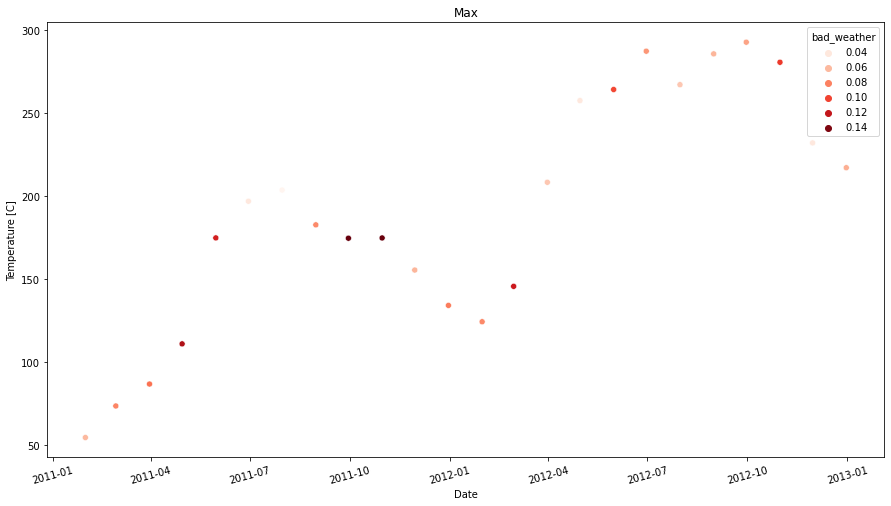

In [2065]:
plt.figure(figsize=(15,8))#
sns.scatterplot(data =df.resample('M').mean(), x = 'datetime', y ='count',hue='bad_weather',palette="Reds")
#sns.scatterplot(data =df[df['workingday']==0].resample('D').mean(), x = 'datetime', y ='count',hue='bad_weather',palette="Blues")
plt.xticks(rotation=15)
plt.ylabel('Temperature [C]')
plt.xlabel('Date')
plt.title('Max')
plt.show()

In [2066]:
#sns.scatterplot(data =df.resample('D').mean(), x = 'temp', y ='count', hue = 'workingday')

In [2067]:
#sns.scatterplot(data =df.resample('3h').mean(), x = 'humidity', y ='count', hue = 'workingday')

In [2068]:
#sns.scatterplot(data =df.resample('3h').mean(), x = 'windspeed', y ='count', hue = 'workingday')

In [2069]:
y = df['count']
X = df[['season', 'holiday', 'workingday', 'weather', 'bad_weather', 'temp', 'atemp', 'humidity', 'windspeed', 'weekday', 'hour', 'month_count', 'month']]


In [2070]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,) #

In [2071]:
ylog_train = np.log1p(y_train)
ylog_test = np.log1p(y_test)

In [2072]:
X_train.columns

Index(['season', 'holiday', 'workingday', 'weather', 'bad_weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'weekday', 'hour', 'month_count',
       'month'],
      dtype='object')

In [2073]:
numerical_pipeline = Pipeline([
    ('num_scaler',StandardScaler()),
    ('polynomial', PolynomialFeatures(degree= 3,)),
    #('num_discritazer',KBinsDiscretizer(n_bins=10, strategy='uniform'),)
])

In [2074]:
categorical_pipeline = Pipeline([
    ('categorical_ohe',OneHotEncoder(sparse=False,drop = 'first')),
    #
])

In [2075]:
polynomial_pipeline_4 = Pipeline([
    ('polynomial', PolynomialFeatures(degree= 4,)),
])

In [2076]:
polynomial_pipeline_4_ohe = Pipeline([
    ('polynomial', PolynomialFeatures(degree= 4,)),
    ('categorical_ohe',OneHotEncoder(sparse=False,drop = 'first')),
    
])

In [2077]:
polynomial_pipeline_2 = Pipeline([
    ('polynomial', PolynomialFeatures(degree= 2,)),
    ('categorical_ohe',OneHotEncoder(sparse=False,drop = 'first')),
])

In [2078]:
column_transformer = ColumnTransformer([
    ('numerical_pipeline',numerical_pipeline,['atemp', 'humidity', 'windspeed', ]),       #scal,poly3
    ('polynomial_4', polynomial_pipeline_4, ['month_count',]),              #poly4
    ('categorical_pipeline',categorical_pipeline,['hour', 'weekday', 'workingday', 'holiday', 'weather',]),   #ohe
    ('polynomial_ohe', polynomial_pipeline_4_ohe, []),                                             #poly4,ohe
    ('polynomial_2', polynomial_pipeline_2, []),  #      #poly2,ohe
    ('do_nothing', 'passthrough',[ ]) #'season','month',  'temp',  'bad_weather',
])

In [2079]:
column_transformer.fit(X_train) #learn how to do the transforamtion
X_train_fe = column_transformer.transform(X_train) #Do the accual transformation
X_test_fe = column_transformer.transform(X_test) #Do the same transformation on test set 

In [2080]:
X_test_fe.shape

(2178, 59)

In [2081]:
poly = PolynomialFeatures(degree= 2, interaction_only=True)
poly.fit(X_test_fe)
X_train_fe_int = poly.transform(X_train_fe)
X_test_fe_int = poly.transform(X_test_fe)

In [2082]:
X_train_fe_int.shape

(8708, 1771)

In [2083]:
m = LinearRegression()
#m = Ridge()

In [2084]:
m.fit(X_train_fe_int,ylog_train)

LinearRegression()

In [2085]:
m.score(X_train_fe_int,ylog_train)

0.966730808580997

In [2086]:
from sklearn.model_selection import cross_val_score
mean_score = cross_val_score(m, X_train_fe_int, ylog_train,cv = 5).mean()
mean_score

0.9449610249149814

In [2087]:
m.score(X_test_fe_int,ylog_test)

0.9518863934619448

In [2088]:
y_predlog = m.predict(X_test_fe_int)

In [2089]:
ypred = np.exp(y_predlog)-1

In [2090]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(y_test, ypred)


0.09236060960542644

In [2091]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, ypred)

27.308897982440197

In [2092]:
train_pred_log = m.predict(X_train_fe_int)
train_pred = np.exp(train_pred_log)-1 
diff = (train_pred - y_train)#/y_train
diff.describe()


count    8708.000000
mean       -2.035727
std        39.019142
min      -318.388694
25%       -14.534319
50%        -0.487794
75%        10.674688
max       362.861123
Name: count, dtype: float64

In [2093]:
train_pred.min()

0.47325175851039614

In [2094]:
max = diff.max()

<AxesSubplot:xlabel='count', ylabel='Count'>

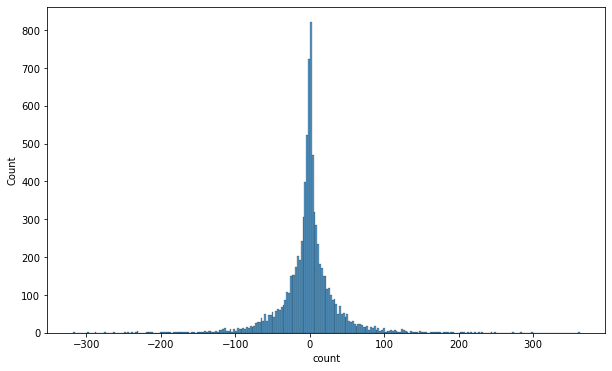

In [2095]:
sns.histplot(diff)
#when negative train_pred is bigger than y_train. Thus model overestimates counts

In [2096]:
ypred,y_test

(array([125.82866469, 123.33889454,   5.9827528 , ...,  12.89433814,
         97.08556553, 302.06943428]),
 datetime
 2011-03-07 16:00:00    122
 2011-10-15 23:00:00    135
 2012-05-11 03:00:00     13
 2012-07-18 19:00:00    516
 2011-09-03 16:00:00    374
                       ... 
 2012-09-18 16:00:00    141
 2012-10-11 02:00:00     11
 2011-01-07 00:00:00     17
 2011-12-14 10:00:00    142
 2011-06-02 16:00:00    318
 Name: count, Length: 2178, dtype: int64)

In [2097]:
min = X.index[0]
max = X.index[-1]
min,max

(Timestamp('2011-01-01 00:00:00'), Timestamp('2012-12-19 23:00:00'))

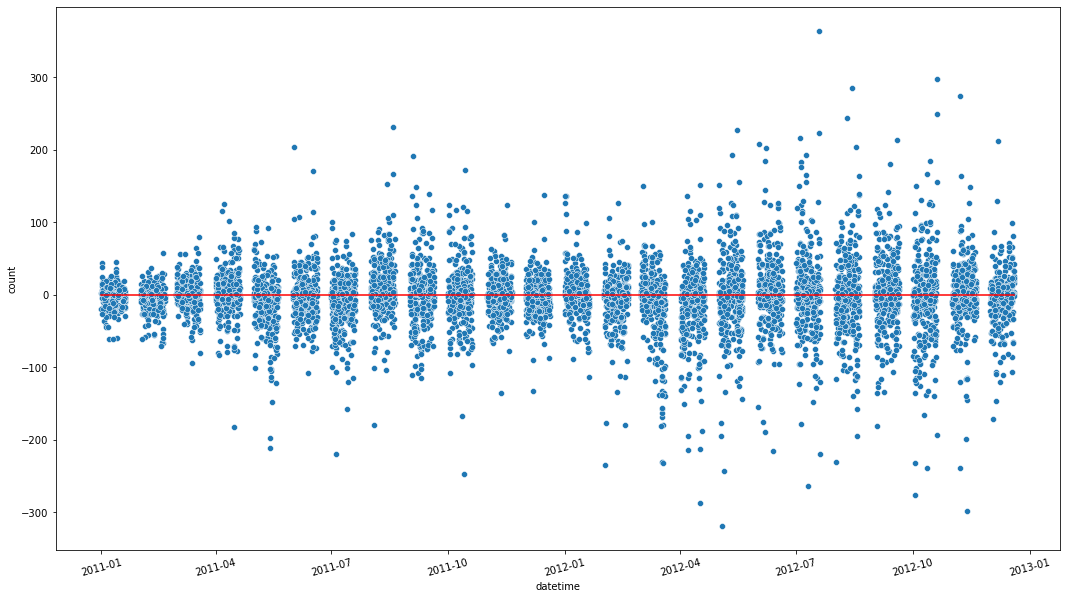

In [2098]:
plt.figure(figsize=(18,10))#
#sns.scatterplot(data =df, x = 'datetime', y ='count', )
sns.scatterplot(data =X_train, x = 'datetime', y =diff) #.resample('h').mean()
plt.plot(
    [min,max],[0,0],color= 'r'
)
plt.xticks(rotation=15)
#plt.ylabel('Temperature [C]')
#plt.xlabel('Date')
#plt.title('Max')
plt.show()

In [2099]:
X_train['ypred'] = m.predict(X_train_fe_int)
X_train['ytrue'] = ylog_train

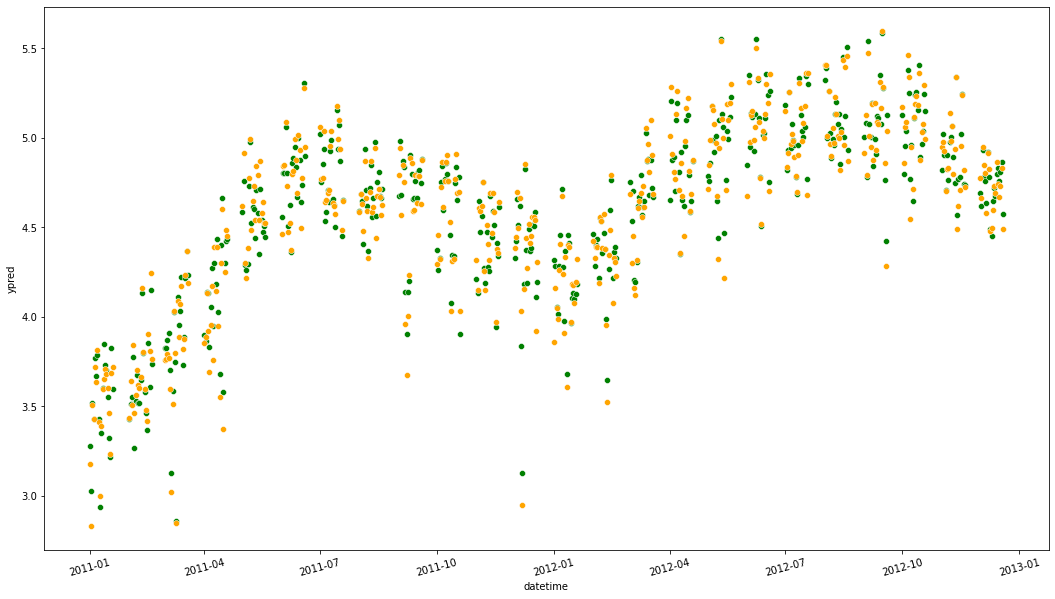

In [2100]:
plt.figure(figsize=(18,10))#
sns.scatterplot(data =X_train.resample('D').mean(), x = 'datetime', y = 'ypred', color = 'green')
sns.scatterplot(data =X_train.resample('D').mean(), x = 'datetime', y = 'ytrue', color = 'orange' )
plt.xticks(rotation=15)
#plt.ylabel('Temperature [C]')
#plt.xlabel('Date')
#plt.title('Max')
plt.show()

In [2101]:
df_k = pd.read_csv('../data/test.csv', index_col=0, parse_dates=True)
df_k.shape

(6493, 8)

In [2102]:
df_k['hour'] = df_k.index.hour
df_k['weekday'] = df_k.index.weekday
df_k['month'] = df_k.index.month
df_k['year'] = df_k.index.year
df_k['year'] = df_k['year'] - 2011
df_k['month_count'] = df_k['month']+df_k['year']*12
df_k['bad_weather'] = np.where(df_k['weather']>2,1,0)
df_k.shape

(6493, 14)

In [2103]:
X_test_kaggle = df_k[['season', 'holiday', 'workingday', 'weather', 'temp',
                     'atemp', 'humidity', 'windspeed', 'weekday', 'hour', 'month_count', 'bad_weather']]
X_test_kaggle.shape

(6493, 12)

In [2104]:
X_test_kaggle_fe = column_transformer.transform(X_test_kaggle) #Do the same transformation on test set 
X_test_kaggle_fe = poly.transform(X_test_kaggle_fe) #Do the same transformation on test set 
X_test_kaggle_fe.shape

(6493, 1771)

In [2105]:
y_predlog_k = m.predict(X_test_kaggle_fe)
y_predlog_k.shape


(6493,)

In [2106]:
ypred_k = np.exp(y_predlog_k)
np.where(ypred_k<0)

(array([], dtype=int64),)

In [2107]:
df_s = pd.read_csv('../data/sampleSubmission.csv', index_col=0, parse_dates=True)
df_s['count']

datetime
2011-01-20 00:00:00    0
2011-01-20 01:00:00    0
2011-01-20 02:00:00    0
2011-01-20 03:00:00    0
2011-01-20 04:00:00    0
                      ..
2012-12-31 19:00:00    0
2012-12-31 20:00:00    0
2012-12-31 21:00:00    0
2012-12-31 22:00:00    0
2012-12-31 23:00:00    0
Name: count, Length: 6493, dtype: int64

In [2108]:
df_s['count'] = ypred_k
df_s.head()

,count
datetime,
2011-01-20 00:00:00,19.487455
2011-01-20 01:00:00,7.118300
2011-01-20 02:00:00,4.757308
2011-01-20 03:00:00,2.875861
2011-01-20 04:00:00,2.066602


In [2109]:
pd.DataFrame(df_s).to_csv("predictions") #try to submit this also!